# Clustering Metrics
Discuss how to use an ensemble of metrics for selecting the optimal number of clusters
### Data
* https://video.ittensive.com/machine-learning/hacktherealty/exposition_train.basic.csv.gz

### Library Import


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

### Data Loading


In [ ]:
train_data = pd.read_csv('https://video.ittensive.com/machine-learning/hacktherealty/exposition_train.basic.csv.gz')
train_data.head()

,total_area,ceiling_height,rooms,living_area,price,day_mean,doy_108,price_locality_name_median,target
0,105.000000,3.00,3,50.000000,95000,2.456912,0,2.261905,1
1,40.000000,3.00,1,19.200001,25000,3.028689,0,1.000000,2
2,37.599998,2.64,0,19.000000,26000,3.091993,0,0.619048,2
3,80.000000,3.00,3,49.000000,35000,3.101010,0,1.250000,2
4,100.000000,3.00,3,49.000000,80000,2.495468,0,1.904762,3


### First 10,000 elements


In [ ]:
train = pd.DataFrame(train_data[0:10000])

### K-means
Build a set of models and evaluate their effectiveness

In [ ]:
kmeans10 = KMeans(n_clusters=10).fit(train)

In [ ]:
kmeans20 = KMeans(n_clusters=20).fit(train)

In [ ]:
kmeans40 = KMeans(n_clusters=40).fit(train)

In [ ]:
kmeans80 = KMeans(n_clusters=80).fit(train)

### Rand
$$RI={\frac {TP+TN}{TP+FP+FN+TN}}$$

In [ ]:
target_cluster10 = kmeans10.predict(train)
target_cluster20 = kmeans20.predict(train)
target_cluster40 = kmeans40.predict(train)
target_cluster80 = kmeans80.predict(train)

In [ ]:
train["target_cluster10"] = target_cluster10
train["target_cluster20"] = target_cluster20
train["target_cluster40"] = target_cluster40
train["target_cluster80"] = target_cluster80

In [ ]:
def predict_class (data, label, clusters_total):
    groups = data.groupby([label,"target"]).count()["total_area"]
    clusters_items = [0]*clusters_total
    clusters_popular = [0]*clusters_total
    clusters_class = [0]*clusters_total
    for group in groups.iteritems():
        items = group[1]
        cluster = group[0][0]
        if items > clusters_popular[cluster]:
            clusters_popular[cluster] = items
            clusters_class[cluster] = group[0][1]
    data[label + "_pred"] = data[label].apply(lambda x:clusters_class[x])
    return data

In [ ]:
train = predict_class(train, "target_cluster10", 10)
train = predict_class(train, "target_cluster20", 20)
train = predict_class(train, "target_cluster40", 40)
train = predict_class(train, "target_cluster80", 80)

In [ ]:
ri = []
ri.append(metrics.rand_score(train["target"], train["target_cluster10_pred"]))
ri.append(metrics.rand_score(train["target"], train["target_cluster20_pred"]))
ri.append(metrics.rand_score(train["target"], train["target_cluster40_pred"]))
ri.append(metrics.rand_score(train["target"], train["target_cluster80_pred"]))

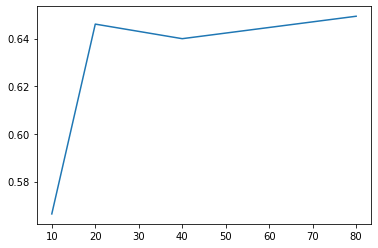

In [ ]:
plt.plot([10, 20, 40, 80], ri)
plt.show()

### Silhouette
$$s = \frac{b - a}{max(a, b)}$$

In [ ]:
sl = []
sl.append(metrics.silhouette_score(train, kmeans10.labels_, metric='euclidean'))
sl.append(metrics.silhouette_score(train, kmeans20.labels_, metric='euclidean'))
sl.append(metrics.silhouette_score(train, kmeans40.labels_, metric='euclidean'))
sl.append(metrics.silhouette_score(train, kmeans80.labels_, metric='euclidean'))

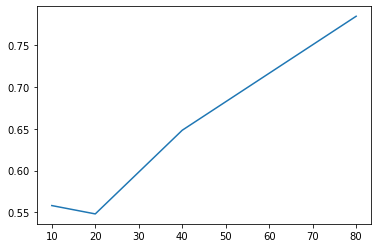

In [ ]:
plt.plot([10, 20, 40, 80], sl)
plt.show()

### Davies-Bouldin Index
$$DB = \frac{1}{k} \sum_{i=1}^k \max_{i \neq j} \frac{s_i + s_j}{d_{ij}}$$

In [ ]:
db = []
db.append(1 - metrics.davies_bouldin_score(train, kmeans10.labels_))
db.append(1 - metrics.davies_bouldin_score(train, kmeans20.labels_))
db.append(1 - metrics.davies_bouldin_score(train, kmeans40.labels_))
db.append(1 - metrics.davies_bouldin_score(train, kmeans80.labels_))

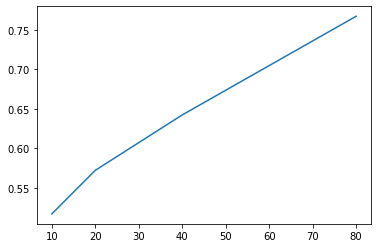

In [ ]:
plt.plot([10, 20, 40, 80], db)
plt.show()

### Calinski-Harabasz Index
$$s = \frac{\mathrm{tr}(B_k)}{\mathrm{tr}(W_k)} \times \frac{n_E - k}{k - 1}$$
$$W_k = \sum_{q=1}^k \sum_{x \in C_q} (x - c_q) (x - c_q)^T$$
$$B_k = \sum_{q=1}^k n_q (c_q - c_E) (c_q - c_E)^T$$

In [ ]:
ch = []
ch.append(metrics.calinski_harabasz_score(train, kmeans10.labels_))
ch.append(metrics.calinski_harabasz_score(train, kmeans20.labels_))
ch.append(metrics.calinski_harabasz_score(train, kmeans40.labels_))
ch.append(metrics.calinski_harabasz_score(train, kmeans80.labels_))

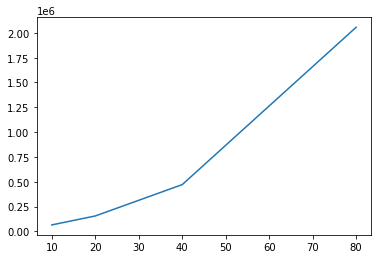

In [ ]:
plt.plot([10, 20, 40, 80], ch)
plt.show()